a) You are given two dimensional input from three separate classes. Your task is to implement a multi-layer perceptron (MLP) 3-class classifier with multiple hidden layers and a regularization on the weights. For the activiation function of the hidden units use ReLU or leaky ReLU. For the predictions use softmax on a linear output layer as we did in class. Your loss layer should compute $-\log P(y = i \,|{\bf x})$ where $i$ is the correct label according to the training data.

Implement each layer type (hidden, output, and loss) as separate python classes, each with methods for initialization, forward propagation, and backpropagation.

Implement a MLP as its own class, with separate methods for initialization, adding a layer, forward propagation, backpropagation, training and prediction. 

Let the layer dimensions be parameters passed when the network is created.

Let the number of training epochs, the mini-batch size, and the regularization parameter be parameters that are passed when training the network.

Build and run your network using your own constructs. The code for doing this might look like what is shown in the next box below.

b) Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points with the three different labels. 

c) Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

d) Re-use this same network on any data of your own choosing. You can increase the dimensionality of the features space as you like. You can also change the number of classes to just two or more than three to align with your data. Separate your data into three piles: training, testing, and validation. Use your validation data to decide when to stop training if appropriate. Use your test set to compute the accuracy of your classfier. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random
seed = 40
random.seed(seed)
np.random.seed(seed)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = random.randint(0,1)
    x2 = random.randint(0,1)
    if x1 == 1 and x2 == 0:
        y = 0
    elif x1 == 0 and x2 == 1:
        y = 0
    elif x1 == 0 and x2 == 0:
        y = 1
    else:
        y = 2
    x1 = 1.0 * x1 + 0.20 * np.random.normal()
    x2 = 1.0 * x2 + 0.20 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y
    
for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,2] = 1

for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 0.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = -0.75 + 0.20 * np.random.normal()
    data.iloc[k,2] = 2
    
# Now let's normalize this data.
data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()
        
data

,x1,x2,y
0,1.547393,1.332714,1.0
1,-0.807819,-1.136988,2.0
2,-0.491334,-1.391906,2.0
3,-0.563306,-1.303681,2.0
4,-0.173864,-1.356085,2.0
...,...,...,...
4995,-0.048251,0.507798,2.0
4996,-0.788497,0.795192,0.0
4997,-1.287817,-0.464451,1.0
4998,-1.185851,0.282852,0.0


In [3]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X = np.matrix(X.values)
y = np.matrix(y.values)

In [4]:

# Sloppy function for plotting our data
def plot_data(X, y_predict):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    indices_0 = [k for k in range(0, X.shape[0]) if y_predict[k] == 0]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k] == 1]
    indices_2 = [k for k in range(0, X.shape[0]) if y_predict[k] == 2]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')
    ax.plot(X[indices_2, 0], X[indices_2,1], marker='o', linestyle='', ms=5, label='2')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Tricky 3 Class Classification')
    plt.show()

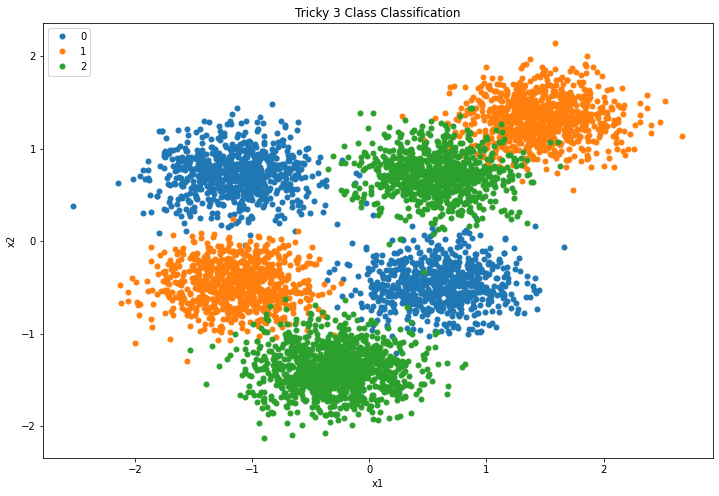

In [5]:
plot_data(X, y)

In [6]:
# Sample Neural Network Model Code

# NN = MLP()
# NN.add_layer('Hidden', dim_in=2, dim_out=16)
# NN.add_layer('Hidden', dim_in=16, dim_out=16)
# NN.add_layer('Hidden', dim_in=16, dim_out=16)
# NN.add_layer('Output', dim_in=16, dim_out=3)
# NN.add_layer('Loss', dim_in=3, dim_out=3)

# loss = NN.train(X, y, epochs=100, bsize=8, alpha=0.0)
# plot_loss(loss)
# plot_decision_regions(NN)

In [7]:
def plot_decision_regions(NN):
  fig, ax = plt.subplots(figsize=(12,8))
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  
  # draw decision boundaries 
  X_dense = np.random.uniform(-3, 3, (50000, 2))
  y_predicted = NN.predict(X_dense)
  indices_0 = [k for k in range(0, X_dense.shape[0]) if y_predicted[k] == 0]
  indices_1 = [k for k in range(0, X_dense.shape[0]) if y_predicted[k] == 1]
  indices_2 = [k for k in range(0, X_dense.shape[0]) if y_predicted[k] == 2]
  ax.plot(X_dense[indices_0, 0],X_dense[indices_0,1],marker='o',color='red',linestyle='',ms=5,label='0-boundary')
  ax.plot(X_dense[indices_1, 0],X_dense[indices_1,1],marker='o',color='purple',linestyle='',ms=5,label='1-boundary')
  ax.plot(X_dense[indices_2, 0],X_dense[indices_2,1],marker='o',color='yellow',linestyle='',ms=5,label='2-boundary')

  # plot original dense sample data
  indices_0 = [k for k in range(0, X.shape[0]) if y[k] == 0]
  indices_1 = [k for k in range(0, X.shape[0]) if y[k] == 1]
  indices_2 = [k for k in range(0, X.shape[0]) if y[k] == 2]
  ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', color='tab:blue', ms=5, label='0-sample')
  ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', color='tab:orange', ms=5, label='1-sample')
  ax.plot(X[indices_2, 0], X[indices_2,1], marker='o', linestyle='', color='tab:green', ms=5, label='2-sample')
      
  ax.legend()
  ax.legend(loc=2)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  set_title = '{} Hidden Layers, {} Hidden Units, Learning rate: {}, Batch size: {},' \
              ' Epochs: {}, Regularization: {}, Accuracy: {:.4f}'\
                .format(len(NN.hidden_layers), NN.hidden_layers[0].dim_out, NN.learning_rate, NN.batch_size, \
                  NN.epochs, NN.regularization, NN.get_accuracy(X, y))
  ax.set_title(set_title)
  plt.show()

def plot_loss(loss):
  fig, ax = plt.subplots(figsize=(12,8))
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  
  ax.plot(loss)
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  set_title = '{} Hidden Layers, {} Hidden Units, Learning rate: {}, Batch size: {},' \
              ' Epochs: {}, Regularization: {}, Accuracy: {:.4f}'\
                .format(len(NN.hidden_layers), NN.hidden_layers[0].dim_out, NN.learning_rate, NN.batch_size, \
                  NN.epochs, NN.regularization, NN.get_accuracy(X, y))
  ax.set_title(set_title)
  plt.show()  

In [8]:
def relu(x):
  return np.maximum(0, x)

def d_relu(x):
  return 1 * (x > 0)

def softmax(x, ax):
  if ax == 1:
    e_x = np.exp(x - np.max(x)) # numerically stable
    return e_x / e_x.sum(axis = 1).reshape(x.shape[0], 1)
  else:
    raise NotImplementedError('Softmax is not implemented for axis: {}'.format(ax))

In [9]:
class Hidden_Layer:
  def __init__(self, dim_in, dim_out):
    self.dim_in = dim_in
    self.dim_out = dim_out
    self.W = np.random.normal(0, 0.1, (dim_in, dim_out)) # change variance accoridngly 
    self.c = np.random.rand(1,dim_out)
  
  def forward_prop(self, X):
    activation_input = X.dot(self.W) + self.c # (Broadcasting!)
    h = relu(activation_input)
    return h

  def backward_prop(self, dL_dh, h, X, learning_rate, regularization):
    f = d_relu(h)
    dL_dW = X.T.dot(np.multiply(f, dL_dh)) + regularization * self.W
    dL_dc = np.mean(np.multiply(f, dL_dh), axis=0).reshape(1, self.dim_out)
    dL_dX = np.multiply(f, dL_dh).dot(self.W.T)
    self.W = self.W - learning_rate * dL_dW
    self.c = self.c - learning_rate * dL_dc
    return dL_dX

class Output_Layer:
  def __init__(self, dim_in, dim_out):
    self.dim_in = dim_in
    self.dim_out = dim_out
    self.W_out = np.random.normal(0, 0.1, (dim_in, dim_out))
    self.b = np.random.rand(1,dim_out)

  def forward_prop(self, h):
    z = h.dot(self.W_out) + self.b
    return z

  def backward_prop(self, dL_dz, h, learning_rate, regularization):
    dL_dh = dL_dz.dot(self.W_out.T)
    dL_dW_out = h.T.dot(dL_dz) + regularization * self.W_out
    dL_db = np.mean(dL_dz, axis=0).reshape(1, self.dim_out)
    self.W_out = self.W_out - learning_rate * dL_dW_out
    self.b = self.b - learning_rate * dL_db
    return dL_dh

class Loss_Layer:
  def __init__(self,dim_in, dim_out):
    self.dim_in = dim_in
    self.dim_out = dim_out

  def forward_prop(self, z, y):
    log_exp_sum = np.log(np.sum(np.exp(z), axis=1))
    sum_reshape = log_exp_sum.reshape(z.shape[0], 1)
    value = -z + np.tile(sum_reshape, z.shape[1])
    y_values = y.flatten().astype(int)
    batch_indices = np.arange(z.shape[0])
    L = value[batch_indices, y_values]
    return np.mean(L)

  def backward_prop(self, z, y):
    value = softmax(z, ax = 1)
    temp = np.zeros(z.shape)
    y_values = y.flatten().astype(int)
    batch_indices = np.arange(z.shape[0])
    temp[batch_indices, y_values] = -1
    dL_dz = value + temp
    return dL_dz   

In [10]:
class MLP:
  def __init__(self):
    self.hidden_layers = [] # empty list as there can be any number of hidden layers
    self.output_layer = None
    self.loss_layer = None
    self.learning_rate = None
    self.epochs = None
    self.regularization = None
    self.batch_size = None

  def add_layer(self, layer_type, dim_in, dim_out):
    if layer_type == 'Output':
      self.output_layer = Output_Layer(dim_in,dim_out)
    elif layer_type == 'Loss':
      self.loss_layer = Loss_Layer(dim_in,dim_out)
    elif layer_type == 'Hidden':
      hidden_layer = Hidden_Layer(dim_in,dim_out)
      self.hidden_layers.append(hidden_layer) # already class Hidden_Layer is accessed 
    else: 
      raise NotImplementedError('Not implemented layer_type : {}'.format(layer_type))

  def forward(self, X, y, regularization): 
    hidden_list = []
    for h_layer in self.hidden_layers:
      h = h_layer.forward_prop(X)
      hidden_list.append(h)
      X = h
    z = self.output_layer.forward_prop(h) # passing h to forward prop function of Output Layer class
    L = self.loss_layer.forward_prop(z,y)
    for h_layer in self.hidden_layers: # L2-regularization
      L += (regularization/2) *(np.linalg.norm(h_layer.W))**2
    L += (regularization/2) *(np.linalg.norm(self.output_layer.W_out))**2
    return hidden_list, z, L

  def backward(self, hidden_list, z, X, y, learning_rate, regularization):
    dL_dz = self.loss_layer.backward_prop(z, y)
    dL_dh = self.output_layer.backward_prop(dL_dz, hidden_list[-1], learning_rate, regularization)
    hidden_length = len(self.hidden_layers)
    for i in range(hidden_length-1, 0, -1):
      dL_dX = self.hidden_layers[i].backward_prop(dL_dh, hidden_list[i], hidden_list[i-1], 
                                                  learning_rate, regularization)
      dL_dh = dL_dX  
    dL_dX = self.hidden_layers[0].backward_prop(dL_dh, hidden_list[0], X, learning_rate, regularization)     
  
  def validation(self, X_val, y_val):
    regularization = self.regularization
    for h_layer in self.hidden_layers:
      h_val = h_layer.forward_prop(X_val)
      X_val = h_val
    z_val = self.output_layer.forward_prop(h_val) # passing h to forward prop function of Output Layer class
    L_val = self.loss_layer.forward_prop(z_val,y_val)
    for h_layer in self.hidden_layers: # L2-regularization
      L_val += (regularization/2) *(np.linalg.norm(h_layer.W))**2
    L_val += (regularization/2) *(np.linalg.norm(self.output_layer.W_out))**2
    return L_val
  
  def train(self, learning_rate, batch_size, epochs, regularization, X, y, X_val=None, y_val=None):
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.epochs = epochs
    self.regularization = regularization
    data_points = np.concatenate((X, y), axis=1)
    loss = []
    val_loss = []
    acc = []
    val_acc = []
    validate = (X_val is not None and y_val is not None)
    for epoch in range(epochs):
      epoch_loss = []
      epoch_val_loss = []
      data_points_shuffle = np.random.permutation(data_points)
      for i in range(int(data_points.shape[0]/batch_size)):
        X_batch = data_points_shuffle[batch_size*i:batch_size*(i+1), 0:X.shape[1]]
        y_batch = data_points_shuffle[batch_size*i:batch_size*(i+1), [X.shape[1]]]
        h_list, z, L = self.forward(X_batch, y_batch, regularization)
        epoch_loss.append(L)
        self.backward(h_list, z, X_batch, y_batch, learning_rate, regularization)
        if validate:
          L_val = self.validation(X_val, y_val)
          epoch_val_loss.append(L_val)
      loss.append(np.mean(epoch_loss))
      val_loss.append(np.mean(epoch_val_loss))
      acc.append(self.get_accuracy(X, y))
      if validate:
        val_acc.append(self.get_accuracy(X_val, y_val))
        print('Epoch {:03d} ==> Loss {:.4f}, Accuracy {:.4f},'\
              ' Val_Loss {:.4f}, Val_Accuracy {:.4f}'
              .format(epoch+1,np.mean(epoch_loss),self.get_accuracy(X, y),
                  np.mean(epoch_val_loss),self.get_accuracy(X_val, y_val)))
      else:  
        print('Epoch {:03d} ==> Loss {:.4f}, Accuracy {:.4f}'
              .format(epoch+1,np.mean(epoch_loss),self.get_accuracy(X, y)))
    if validate:
      return loss, val_loss, acc , val_acc
    else:
      return loss   

  def predict(self, X):
    for hidden_layer in self.hidden_layers:
      h = hidden_layer.forward_prop(X)
      X = h
    z = self.output_layer.forward_prop(h)
    y = np.argmax(z, axis=1).reshape(z.shape[0], 1)
    return y
    
  def get_accuracy(self, X, y):
    y_pred = self.predict(X)
    return np.count_nonzero(y_pred==y)/X.shape[0] 

In [11]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=3)
NN.add_layer("Output", dim_in=3, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0973, Accuracy 0.4128
Epoch 002 ==> Loss 1.0702, Accuracy 0.3980
Epoch 003 ==> Loss 1.0356, Accuracy 0.4406
Epoch 004 ==> Loss 1.0009, Accuracy 0.4576
Epoch 005 ==> Loss 0.9723, Accuracy 0.5284
Epoch 006 ==> Loss 0.9479, Accuracy 0.5656
Epoch 007 ==> Loss 0.9230, Accuracy 0.6086
Epoch 008 ==> Loss 0.8972, Accuracy 0.6042
Epoch 009 ==> Loss 0.8619, Accuracy 0.5784
Epoch 010 ==> Loss 0.8355, Accuracy 0.5740
Epoch 011 ==> Loss 0.8169, Accuracy 0.5980
Epoch 012 ==> Loss 0.7997, Accuracy 0.6116
Epoch 013 ==> Loss 0.7832, Accuracy 0.6162
Epoch 014 ==> Loss 0.7678, Accuracy 0.6322
Epoch 015 ==> Loss 0.7530, Accuracy 0.6432
Epoch 016 ==> Loss 0.7392, Accuracy 0.6336
Epoch 017 ==> Loss 0.7268, Accuracy 0.6036
Epoch 018 ==> Loss 0.7152, Accuracy 0.6398
Epoch 019 ==> Loss 0.7053, Accuracy 0.6400
Epoch 020 ==> Loss 0.6955, Accuracy 0.6416
Epoch 021 ==> Loss 0.6866, Accuracy 0.6416
Epoch 022 ==> Loss 0.6777, Accuracy 0.6374
Epoch 023 ==> Loss 0.6688, Accuracy 0.6414
Epoch 024 =

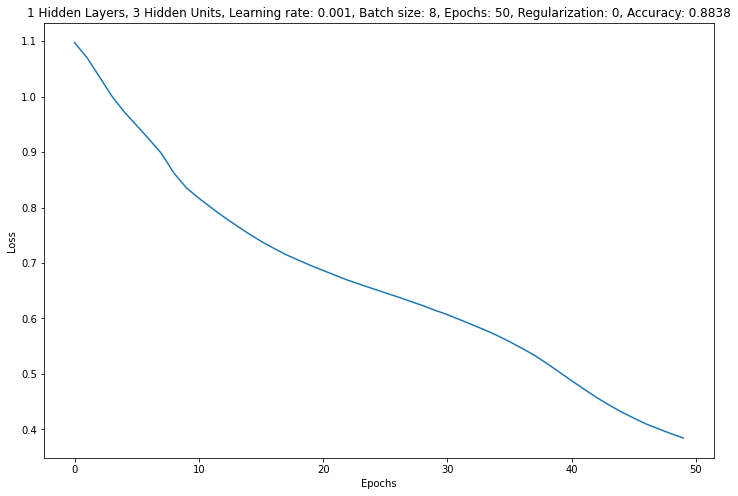

In [12]:
plot_loss(loss)

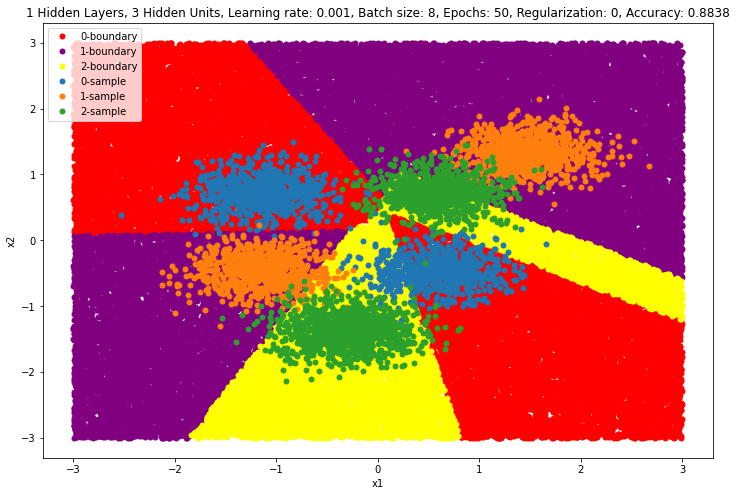

In [13]:
plot_decision_regions(NN)

In [14]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=8)
NN.add_layer("Output", dim_in=8, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0795, Accuracy 0.3906
Epoch 002 ==> Loss 1.0222, Accuracy 0.3942
Epoch 003 ==> Loss 0.9865, Accuracy 0.4210
Epoch 004 ==> Loss 0.9698, Accuracy 0.4526
Epoch 005 ==> Loss 0.9639, Accuracy 0.5366
Epoch 006 ==> Loss 0.9601, Accuracy 0.5314
Epoch 007 ==> Loss 0.9526, Accuracy 0.5458
Epoch 008 ==> Loss 0.9310, Accuracy 0.5514
Epoch 009 ==> Loss 0.8770, Accuracy 0.6486
Epoch 010 ==> Loss 0.7826, Accuracy 0.6890
Epoch 011 ==> Loss 0.6739, Accuracy 0.7024
Epoch 012 ==> Loss 0.5775, Accuracy 0.7804
Epoch 013 ==> Loss 0.4994, Accuracy 0.8606
Epoch 014 ==> Loss 0.4402, Accuracy 0.8774
Epoch 015 ==> Loss 0.3962, Accuracy 0.8868
Epoch 016 ==> Loss 0.3644, Accuracy 0.9026
Epoch 017 ==> Loss 0.3409, Accuracy 0.8998
Epoch 018 ==> Loss 0.3234, Accuracy 0.9110
Epoch 019 ==> Loss 0.3090, Accuracy 0.9122
Epoch 020 ==> Loss 0.2975, Accuracy 0.9164
Epoch 021 ==> Loss 0.2882, Accuracy 0.9172
Epoch 022 ==> Loss 0.2800, Accuracy 0.9186
Epoch 023 ==> Loss 0.2733, Accuracy 0.9178
Epoch 024 =

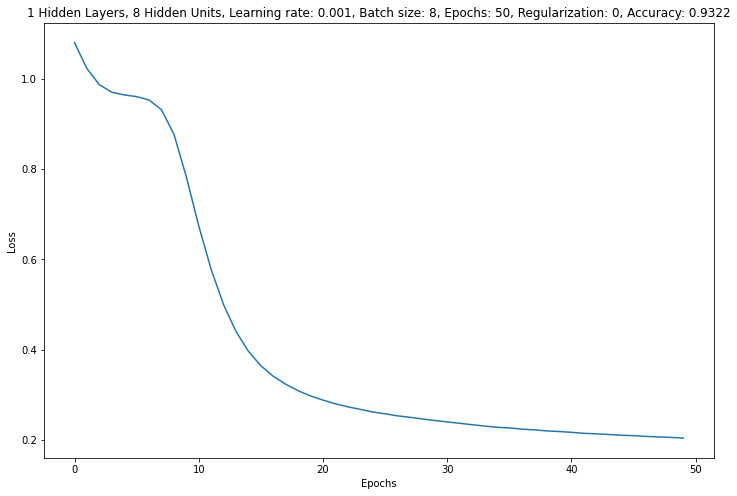

In [15]:
plot_loss(loss)

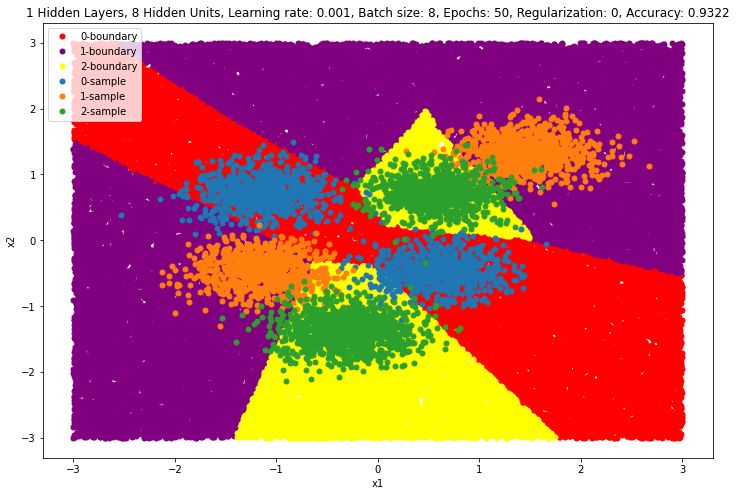

In [16]:
plot_decision_regions(NN)

In [17]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0544, Accuracy 0.5120
Epoch 002 ==> Loss 0.9799, Accuracy 0.5410
Epoch 003 ==> Loss 0.9435, Accuracy 0.5398
Epoch 004 ==> Loss 0.9089, Accuracy 0.5424
Epoch 005 ==> Loss 0.8641, Accuracy 0.5466
Epoch 006 ==> Loss 0.8110, Accuracy 0.5620
Epoch 007 ==> Loss 0.7410, Accuracy 0.6574
Epoch 008 ==> Loss 0.6566, Accuracy 0.8008
Epoch 009 ==> Loss 0.5628, Accuracy 0.8292
Epoch 010 ==> Loss 0.4737, Accuracy 0.8810
Epoch 011 ==> Loss 0.4027, Accuracy 0.9234
Epoch 012 ==> Loss 0.3499, Accuracy 0.9244
Epoch 013 ==> Loss 0.3096, Accuracy 0.9344
Epoch 014 ==> Loss 0.2790, Accuracy 0.9364
Epoch 015 ==> Loss 0.2560, Accuracy 0.9348
Epoch 016 ==> Loss 0.2378, Accuracy 0.9452
Epoch 017 ==> Loss 0.2237, Accuracy 0.9406
Epoch 018 ==> Loss 0.2125, Accuracy 0.9448
Epoch 019 ==> Loss 0.2033, Accuracy 0.9444
Epoch 020 ==> Loss 0.1962, Accuracy 0.9442
Epoch 021 ==> Loss 0.1897, Accuracy 0.9448
Epoch 022 ==> Loss 0.1848, Accuracy 0.9454
Epoch 023 ==> Loss 0.1804, Accuracy 0.9468
Epoch 024 =

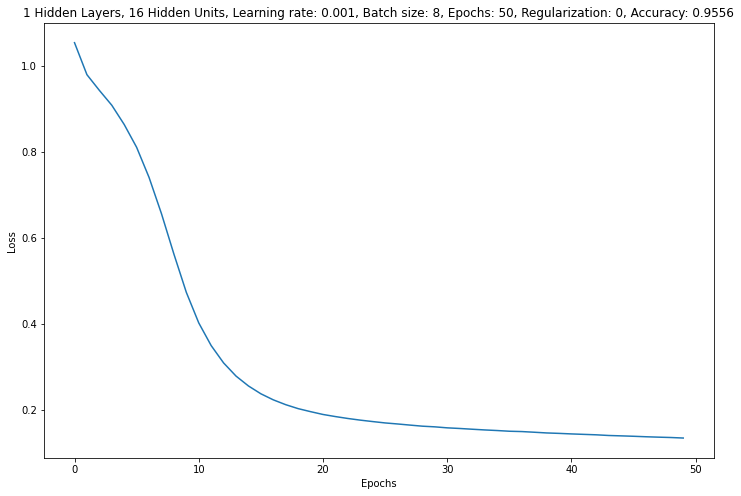

In [18]:
plot_loss(loss)

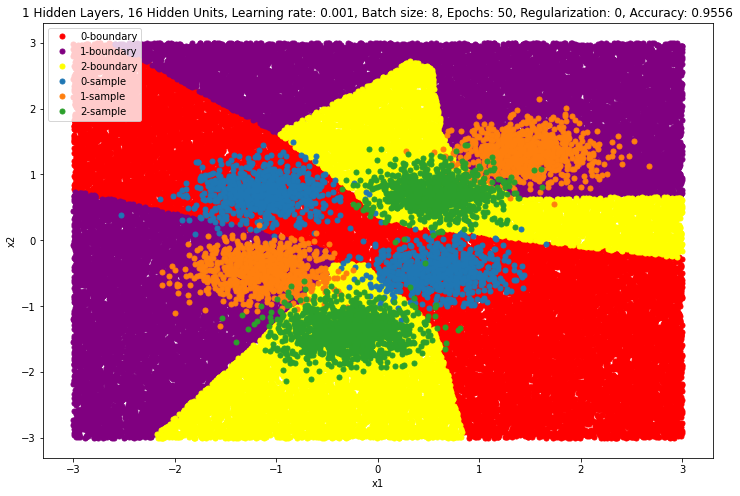

In [19]:
plot_decision_regions(NN)

In [20]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=3)
NN.add_layer("Hidden", dim_in=3, dim_out=3)
NN.add_layer("Hidden", dim_in=3, dim_out=3)
NN.add_layer("Output", dim_in=3, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0955, Accuracy 0.3750
Epoch 002 ==> Loss 1.0942, Accuracy 0.3750
Epoch 003 ==> Loss 1.0938, Accuracy 0.3750
Epoch 004 ==> Loss 1.0936, Accuracy 0.3750
Epoch 005 ==> Loss 1.0935, Accuracy 0.3750
Epoch 006 ==> Loss 1.0934, Accuracy 0.3750
Epoch 007 ==> Loss 1.0934, Accuracy 0.3750
Epoch 008 ==> Loss 1.0933, Accuracy 0.3750
Epoch 009 ==> Loss 1.0931, Accuracy 0.3750
Epoch 010 ==> Loss 1.0930, Accuracy 0.3750
Epoch 011 ==> Loss 1.0928, Accuracy 0.3750
Epoch 012 ==> Loss 1.0924, Accuracy 0.3750
Epoch 013 ==> Loss 1.0919, Accuracy 0.3750
Epoch 014 ==> Loss 1.0910, Accuracy 0.3750
Epoch 015 ==> Loss 1.0899, Accuracy 0.3750
Epoch 016 ==> Loss 1.0880, Accuracy 0.3760
Epoch 017 ==> Loss 1.0847, Accuracy 0.4994
Epoch 018 ==> Loss 1.0801, Accuracy 0.3948
Epoch 019 ==> Loss 1.0733, Accuracy 0.4146
Epoch 020 ==> Loss 1.0632, Accuracy 0.4862
Epoch 021 ==> Loss 1.0513, Accuracy 0.5284
Epoch 022 ==> Loss 1.0406, Accuracy 0.5402
Epoch 023 ==> Loss 1.0322, Accuracy 0.5400
Epoch 024 =

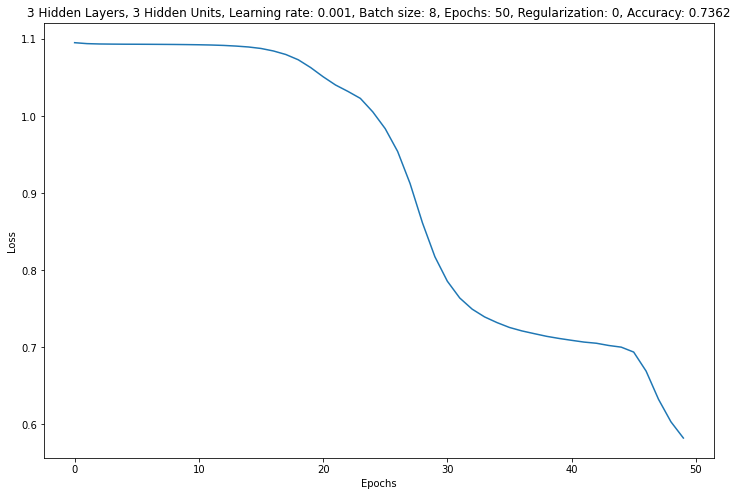

In [21]:
plot_loss(loss)

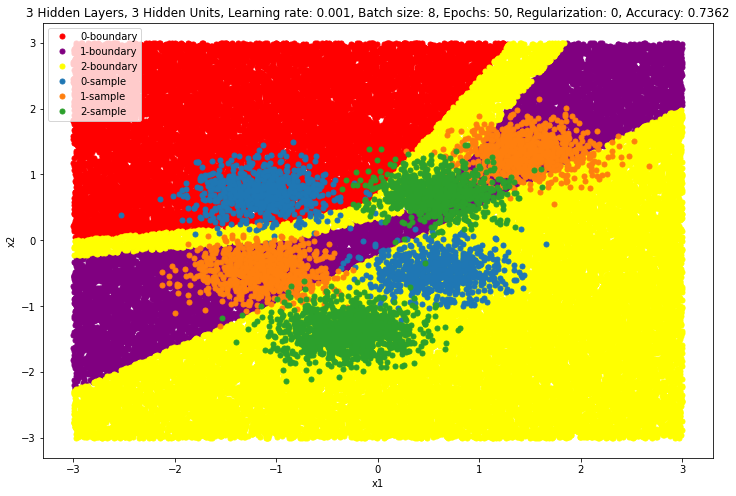

In [22]:
plot_decision_regions(NN)

In [23]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=8)
NN.add_layer("Hidden", dim_in=8, dim_out=8)
NN.add_layer("Hidden", dim_in=8, dim_out=8)
NN.add_layer("Output", dim_in=8, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0941, Accuracy 0.3750
Epoch 002 ==> Loss 1.0931, Accuracy 0.3750
Epoch 003 ==> Loss 1.0925, Accuracy 0.3750
Epoch 004 ==> Loss 1.0917, Accuracy 0.3750
Epoch 005 ==> Loss 1.0899, Accuracy 0.3750
Epoch 006 ==> Loss 1.0864, Accuracy 0.3798
Epoch 007 ==> Loss 1.0766, Accuracy 0.4956
Epoch 008 ==> Loss 1.0534, Accuracy 0.4614
Epoch 009 ==> Loss 1.0052, Accuracy 0.4216
Epoch 010 ==> Loss 0.9577, Accuracy 0.5790
Epoch 011 ==> Loss 0.8968, Accuracy 0.6130
Epoch 012 ==> Loss 0.7391, Accuracy 0.7364
Epoch 013 ==> Loss 0.5324, Accuracy 0.7896
Epoch 014 ==> Loss 0.4043, Accuracy 0.8706
Epoch 015 ==> Loss 0.2865, Accuracy 0.9374
Epoch 016 ==> Loss 0.1927, Accuracy 0.9446
Epoch 017 ==> Loss 0.1675, Accuracy 0.9450
Epoch 018 ==> Loss 0.1538, Accuracy 0.9504
Epoch 019 ==> Loss 0.1483, Accuracy 0.9506
Epoch 020 ==> Loss 0.1420, Accuracy 0.9512
Epoch 021 ==> Loss 0.1360, Accuracy 0.9558
Epoch 022 ==> Loss 0.1340, Accuracy 0.9560
Epoch 023 ==> Loss 0.1288, Accuracy 0.9586
Epoch 024 =

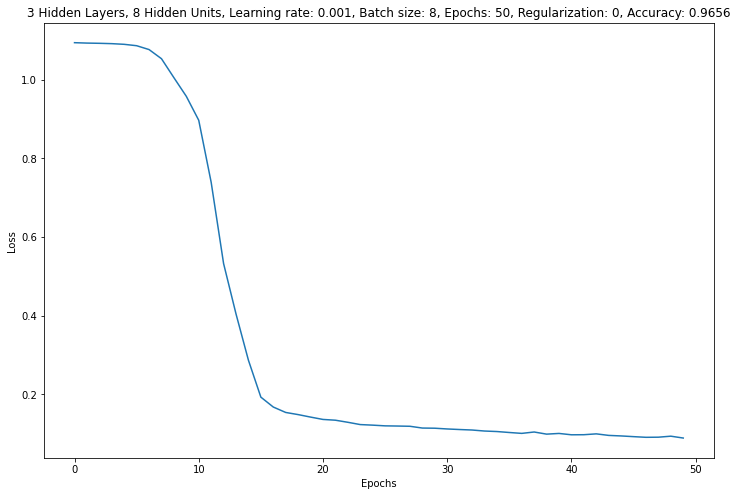

In [24]:
plot_loss(loss)

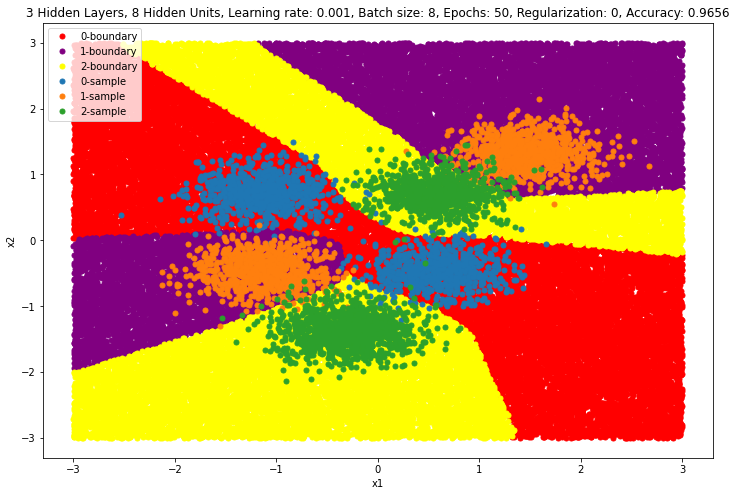

In [25]:
plot_decision_regions(NN)

In [26]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.001, batch_size=8, epochs=50, regularization=0, X=X, y=y)

Epoch 001 ==> Loss 1.0925, Accuracy 0.3750
Epoch 002 ==> Loss 1.0807, Accuracy 0.5292
Epoch 003 ==> Loss 1.0523, Accuracy 0.4310
Epoch 004 ==> Loss 0.9842, Accuracy 0.4966
Epoch 005 ==> Loss 0.9171, Accuracy 0.5660
Epoch 006 ==> Loss 0.8413, Accuracy 0.6254
Epoch 007 ==> Loss 0.7248, Accuracy 0.6392
Epoch 008 ==> Loss 0.5689, Accuracy 0.8564
Epoch 009 ==> Loss 0.3612, Accuracy 0.9116
Epoch 010 ==> Loss 0.2504, Accuracy 0.9262
Epoch 011 ==> Loss 0.2046, Accuracy 0.9402
Epoch 012 ==> Loss 0.1793, Accuracy 0.9448
Epoch 013 ==> Loss 0.1633, Accuracy 0.9498
Epoch 014 ==> Loss 0.1525, Accuracy 0.9512
Epoch 015 ==> Loss 0.1440, Accuracy 0.9542
Epoch 016 ==> Loss 0.1356, Accuracy 0.9490
Epoch 017 ==> Loss 0.1282, Accuracy 0.9582
Epoch 018 ==> Loss 0.1233, Accuracy 0.9606
Epoch 019 ==> Loss 0.1182, Accuracy 0.9580
Epoch 020 ==> Loss 0.1135, Accuracy 0.9614
Epoch 021 ==> Loss 0.1103, Accuracy 0.9630
Epoch 022 ==> Loss 0.1071, Accuracy 0.9618
Epoch 023 ==> Loss 0.1047, Accuracy 0.9642
Epoch 024 =

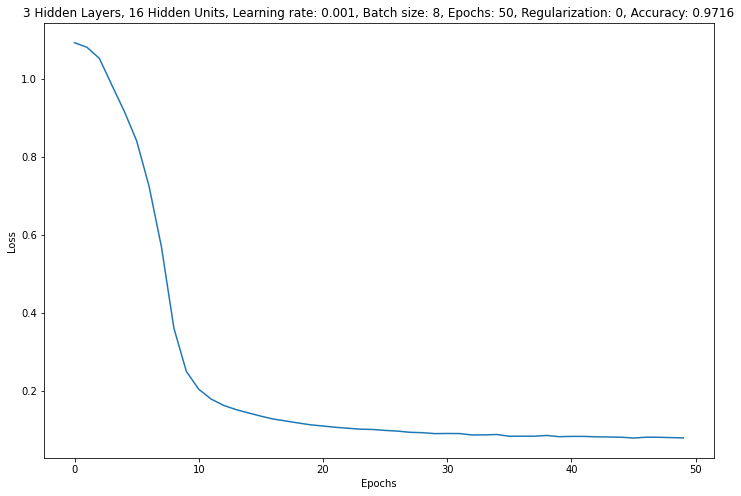

In [27]:
plot_loss(loss)

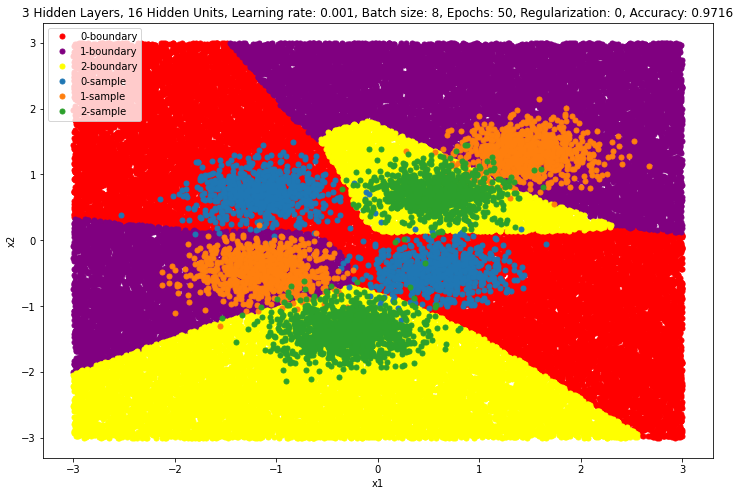

In [28]:
plot_decision_regions(NN)

In [29]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=3)
NN.add_layer("Output", dim_in=3, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 0.9789, Accuracy 0.6152
Epoch 002 ==> Loss 0.7723, Accuracy 0.8168
Epoch 003 ==> Loss 0.5688, Accuracy 0.8362
Epoch 004 ==> Loss 0.5519, Accuracy 0.8812
Epoch 005 ==> Loss 0.5481, Accuracy 0.9210
Epoch 006 ==> Loss 0.5492, Accuracy 0.9398
Epoch 007 ==> Loss 0.5495, Accuracy 0.9338
Epoch 008 ==> Loss 0.5494, Accuracy 0.9354
Epoch 009 ==> Loss 0.5486, Accuracy 0.9452
Epoch 010 ==> Loss 0.5495, Accuracy 0.9444
Epoch 011 ==> Loss 0.5492, Accuracy 0.9460
Epoch 012 ==> Loss 0.5504, Accuracy 0.9416
Epoch 013 ==> Loss 0.5496, Accuracy 0.9416
Epoch 014 ==> Loss 0.5496, Accuracy 0.9432
Epoch 015 ==> Loss 0.5506, Accuracy 0.9410
Epoch 016 ==> Loss 0.5512, Accuracy 0.9496
Epoch 017 ==> Loss 0.5493, Accuracy 0.9426
Epoch 018 ==> Loss 0.5512, Accuracy 0.9426
Epoch 019 ==> Loss 0.5490, Accuracy 0.9406
Epoch 020 ==> Loss 0.5497, Accuracy 0.9488
Epoch 021 ==> Loss 0.5506, Accuracy 0.9426
Epoch 022 ==> Loss 0.5496, Accuracy 0.9502
Epoch 023 ==> Loss 0.5483, Accuracy 0.9404
Epoch 024 =

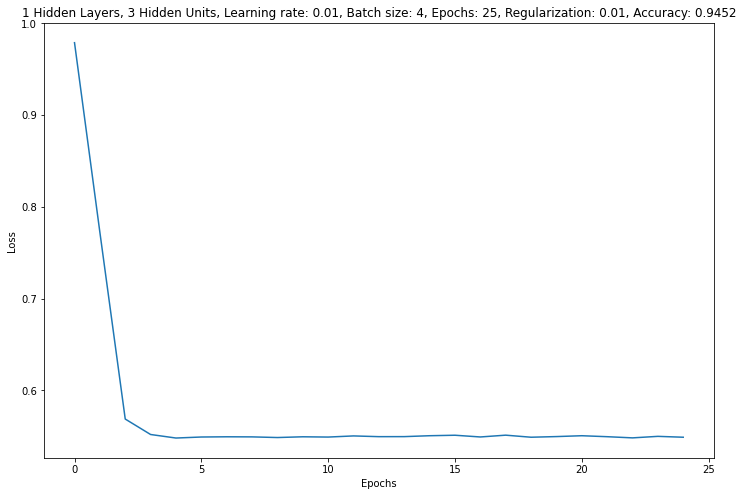

In [30]:
plot_loss(loss)

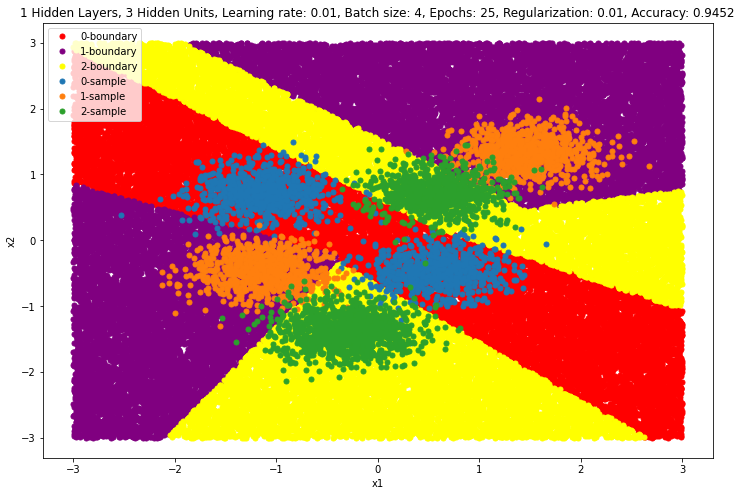

In [31]:
plot_decision_regions(NN)

In [32]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=8)
NN.add_layer("Output", dim_in=8, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 0.9428, Accuracy 0.6438
Epoch 002 ==> Loss 0.6201, Accuracy 0.8162
Epoch 003 ==> Loss 0.5172, Accuracy 0.9288
Epoch 004 ==> Loss 0.4877, Accuracy 0.9442
Epoch 005 ==> Loss 0.4792, Accuracy 0.9496
Epoch 006 ==> Loss 0.4770, Accuracy 0.9540
Epoch 007 ==> Loss 0.4752, Accuracy 0.9576
Epoch 008 ==> Loss 0.4756, Accuracy 0.9574
Epoch 009 ==> Loss 0.4732, Accuracy 0.9610
Epoch 010 ==> Loss 0.4751, Accuracy 0.9590
Epoch 011 ==> Loss 0.4745, Accuracy 0.9568
Epoch 012 ==> Loss 0.4740, Accuracy 0.9636
Epoch 013 ==> Loss 0.4747, Accuracy 0.9648
Epoch 014 ==> Loss 0.4755, Accuracy 0.9644
Epoch 015 ==> Loss 0.4751, Accuracy 0.9576
Epoch 016 ==> Loss 0.4754, Accuracy 0.9644
Epoch 017 ==> Loss 0.4763, Accuracy 0.9656
Epoch 018 ==> Loss 0.4738, Accuracy 0.9662
Epoch 019 ==> Loss 0.4752, Accuracy 0.9678
Epoch 020 ==> Loss 0.4741, Accuracy 0.9664
Epoch 021 ==> Loss 0.4721, Accuracy 0.9682
Epoch 022 ==> Loss 0.4715, Accuracy 0.9678
Epoch 023 ==> Loss 0.4724, Accuracy 0.9692
Epoch 024 =

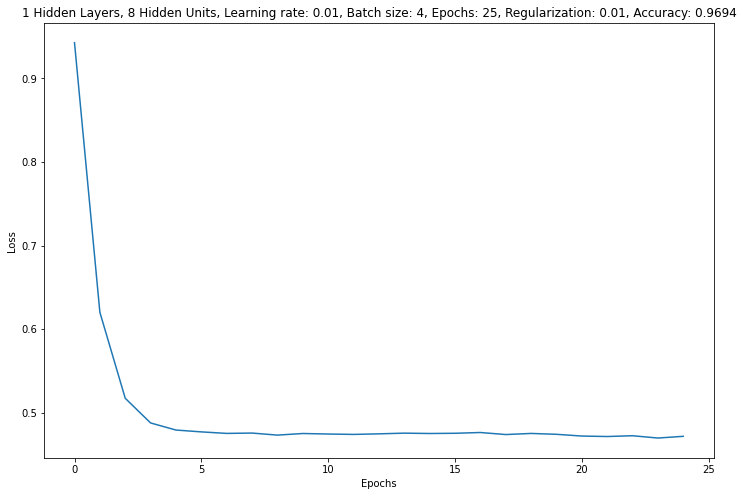

In [33]:
plot_loss(loss)

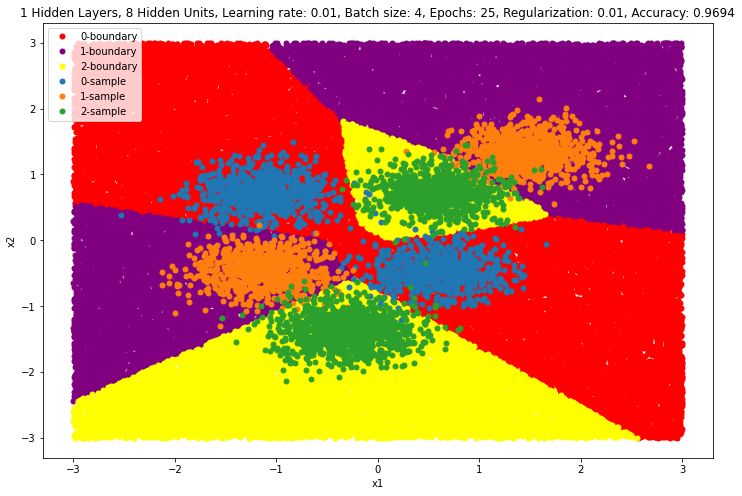

In [34]:
plot_decision_regions(NN)

In [35]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 0.7115, Accuracy 0.8990
Epoch 002 ==> Loss 0.4709, Accuracy 0.9286
Epoch 003 ==> Loss 0.4834, Accuracy 0.9384
Epoch 004 ==> Loss 0.4890, Accuracy 0.9410
Epoch 005 ==> Loss 0.4905, Accuracy 0.9446
Epoch 006 ==> Loss 0.4885, Accuracy 0.9502
Epoch 007 ==> Loss 0.4845, Accuracy 0.9520
Epoch 008 ==> Loss 0.4802, Accuracy 0.9556
Epoch 009 ==> Loss 0.4802, Accuracy 0.9580
Epoch 010 ==> Loss 0.4812, Accuracy 0.9584
Epoch 011 ==> Loss 0.4794, Accuracy 0.9622
Epoch 012 ==> Loss 0.4807, Accuracy 0.9632
Epoch 013 ==> Loss 0.4825, Accuracy 0.9634
Epoch 014 ==> Loss 0.4802, Accuracy 0.9622
Epoch 015 ==> Loss 0.4824, Accuracy 0.9656
Epoch 016 ==> Loss 0.4813, Accuracy 0.9642
Epoch 017 ==> Loss 0.4817, Accuracy 0.9666
Epoch 018 ==> Loss 0.4831, Accuracy 0.9640
Epoch 019 ==> Loss 0.4831, Accuracy 0.9664
Epoch 020 ==> Loss 0.4821, Accuracy 0.9650
Epoch 021 ==> Loss 0.4829, Accuracy 0.9676
Epoch 022 ==> Loss 0.4813, Accuracy 0.9676
Epoch 023 ==> Loss 0.4818, Accuracy 0.9682
Epoch 024 =

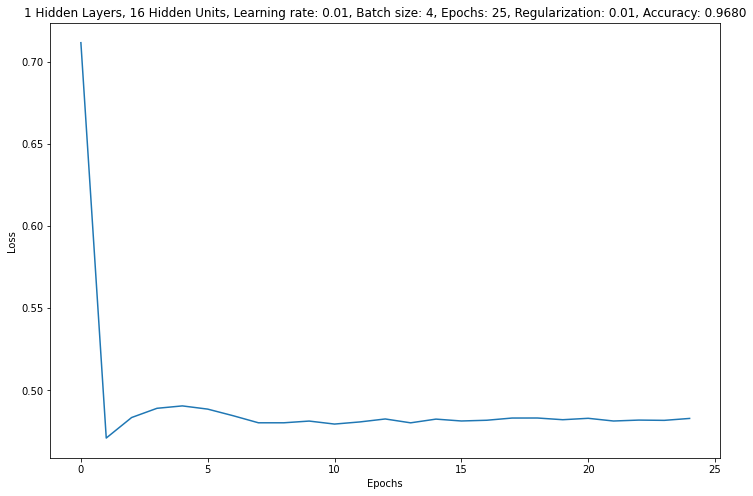

In [36]:
plot_loss(loss)

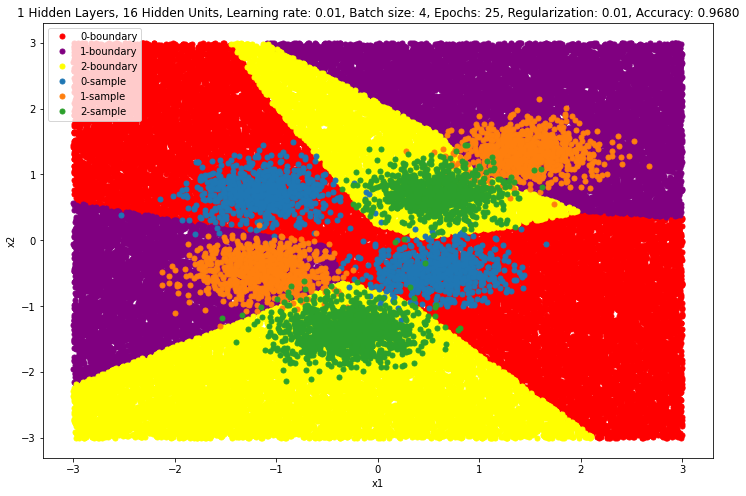

In [37]:
plot_decision_regions(NN)

In [38]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=3)
NN.add_layer("Hidden", dim_in=3, dim_out=3)
NN.add_layer("Hidden", dim_in=3, dim_out=3)
NN.add_layer("Output", dim_in=3, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 1.0997, Accuracy 0.3750
Epoch 002 ==> Loss 1.0403, Accuracy 0.5332
Epoch 003 ==> Loss 0.9250, Accuracy 0.5460
Epoch 004 ==> Loss 0.8581, Accuracy 0.7938
Epoch 005 ==> Loss 0.5910, Accuracy 0.8230
Epoch 006 ==> Loss 0.5448, Accuracy 0.8264
Epoch 007 ==> Loss 0.5328, Accuracy 0.8238
Epoch 008 ==> Loss 0.5205, Accuracy 0.8562
Epoch 009 ==> Loss 0.5146, Accuracy 0.8462
Epoch 010 ==> Loss 0.5064, Accuracy 0.8120
Epoch 011 ==> Loss 0.4978, Accuracy 0.8818
Epoch 012 ==> Loss 0.4992, Accuracy 0.9008
Epoch 013 ==> Loss 0.4821, Accuracy 0.8602
Epoch 014 ==> Loss 0.4884, Accuracy 0.9274
Epoch 015 ==> Loss 0.5048, Accuracy 0.9344
Epoch 016 ==> Loss 0.4868, Accuracy 0.9598
Epoch 017 ==> Loss 0.4878, Accuracy 0.9332
Epoch 018 ==> Loss 0.4833, Accuracy 0.8624
Epoch 019 ==> Loss 0.4660, Accuracy 0.9540
Epoch 020 ==> Loss 0.4521, Accuracy 0.9210
Epoch 021 ==> Loss 0.4625, Accuracy 0.9366
Epoch 022 ==> Loss 0.4587, Accuracy 0.9534
Epoch 023 ==> Loss 0.4523, Accuracy 0.9590
Epoch 024 =

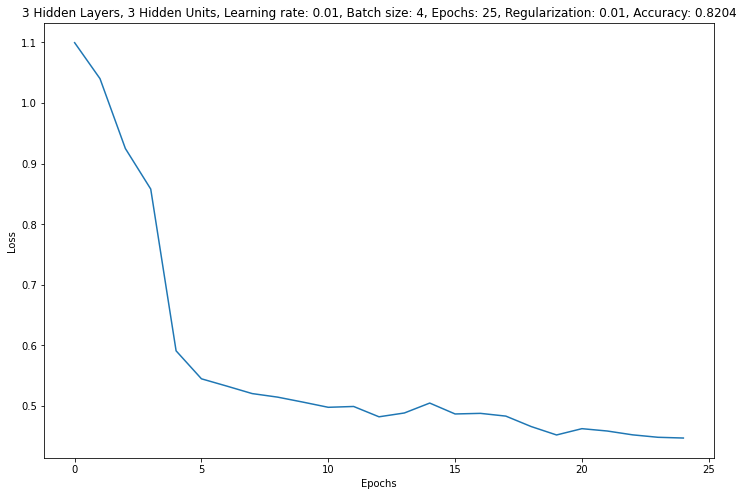

In [39]:
plot_loss(loss)

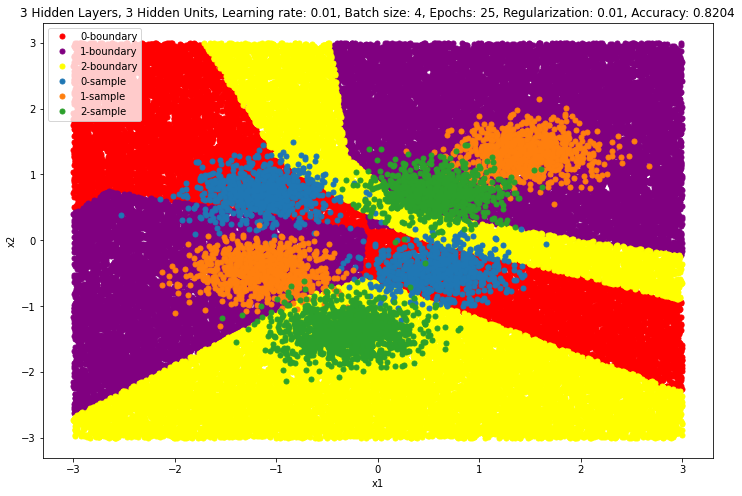

In [40]:
plot_decision_regions(NN)

In [41]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=8)
NN.add_layer("Hidden", dim_in=8, dim_out=8)
NN.add_layer("Hidden", dim_in=8, dim_out=8)
NN.add_layer("Output", dim_in=8, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 1.0796, Accuracy 0.5442
Epoch 002 ==> Loss 0.9505, Accuracy 0.5876
Epoch 003 ==> Loss 0.6483, Accuracy 0.9234
Epoch 004 ==> Loss 0.4073, Accuracy 0.9554
Epoch 005 ==> Loss 0.3851, Accuracy 0.9588
Epoch 006 ==> Loss 0.3809, Accuracy 0.9596
Epoch 007 ==> Loss 0.3761, Accuracy 0.9502
Epoch 008 ==> Loss 0.3661, Accuracy 0.9598
Epoch 009 ==> Loss 0.3675, Accuracy 0.9584
Epoch 010 ==> Loss 0.3683, Accuracy 0.9606
Epoch 011 ==> Loss 0.3601, Accuracy 0.9610
Epoch 012 ==> Loss 0.3645, Accuracy 0.9686
Epoch 013 ==> Loss 0.3560, Accuracy 0.9628
Epoch 014 ==> Loss 0.3560, Accuracy 0.9688
Epoch 015 ==> Loss 0.3582, Accuracy 0.9618
Epoch 016 ==> Loss 0.3539, Accuracy 0.9700
Epoch 017 ==> Loss 0.3516, Accuracy 0.9144
Epoch 018 ==> Loss 0.3536, Accuracy 0.9546
Epoch 019 ==> Loss 0.3505, Accuracy 0.9478
Epoch 020 ==> Loss 0.3490, Accuracy 0.9574
Epoch 021 ==> Loss 0.3432, Accuracy 0.9644
Epoch 022 ==> Loss 0.3475, Accuracy 0.9632
Epoch 023 ==> Loss 0.3467, Accuracy 0.9628
Epoch 024 =

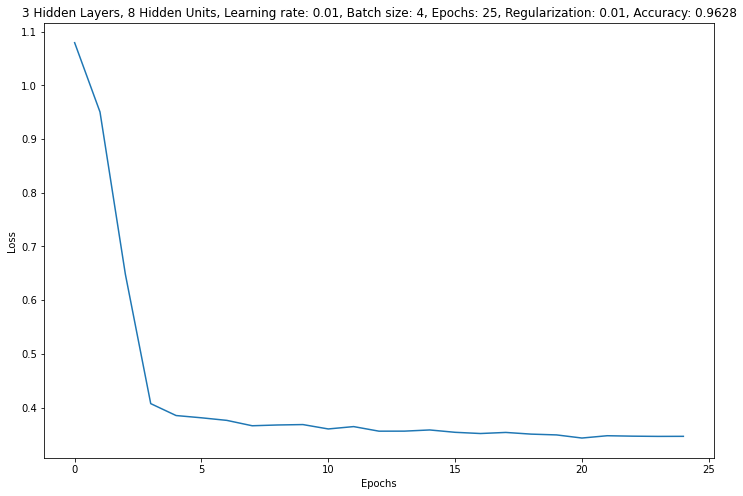

In [42]:
plot_loss(loss)

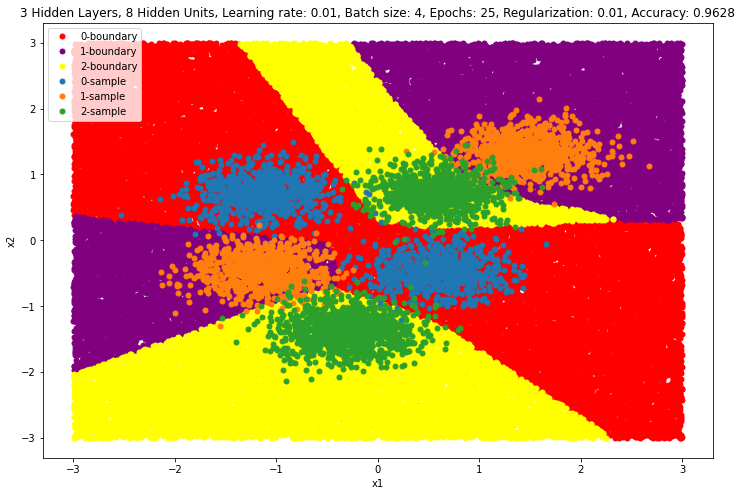

In [43]:
plot_decision_regions(NN)

In [44]:
NN = MLP()
NN.add_layer("Hidden", dim_in=2, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=3)
NN.add_layer("Loss", dim_in=3, dim_out=3)

loss = NN.train(learning_rate=0.01, batch_size=4, epochs=25, regularization=0.01, X=X, y=y)

Epoch 001 ==> Loss 0.9164, Accuracy 0.9388
Epoch 002 ==> Loss 0.4196, Accuracy 0.9446
Epoch 003 ==> Loss 0.4119, Accuracy 0.9534
Epoch 004 ==> Loss 0.4024, Accuracy 0.9676
Epoch 005 ==> Loss 0.3976, Accuracy 0.9590
Epoch 006 ==> Loss 0.3921, Accuracy 0.9692
Epoch 007 ==> Loss 0.3883, Accuracy 0.9686
Epoch 008 ==> Loss 0.3842, Accuracy 0.9618
Epoch 009 ==> Loss 0.3792, Accuracy 0.9466
Epoch 010 ==> Loss 0.3780, Accuracy 0.9670
Epoch 011 ==> Loss 0.3728, Accuracy 0.9660
Epoch 012 ==> Loss 0.3673, Accuracy 0.9638
Epoch 013 ==> Loss 0.3658, Accuracy 0.9616
Epoch 014 ==> Loss 0.3668, Accuracy 0.9596
Epoch 015 ==> Loss 0.3665, Accuracy 0.9696
Epoch 016 ==> Loss 0.3628, Accuracy 0.9652
Epoch 017 ==> Loss 0.3619, Accuracy 0.9658
Epoch 018 ==> Loss 0.3650, Accuracy 0.9506
Epoch 019 ==> Loss 0.3614, Accuracy 0.9650
Epoch 020 ==> Loss 0.3619, Accuracy 0.9670
Epoch 021 ==> Loss 0.3603, Accuracy 0.9506
Epoch 022 ==> Loss 0.3561, Accuracy 0.9698
Epoch 023 ==> Loss 0.3584, Accuracy 0.9600
Epoch 024 =

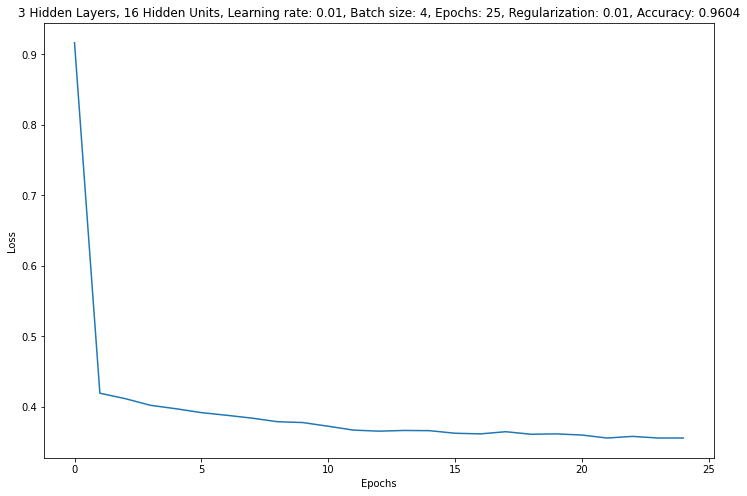

In [45]:
plot_loss(loss)

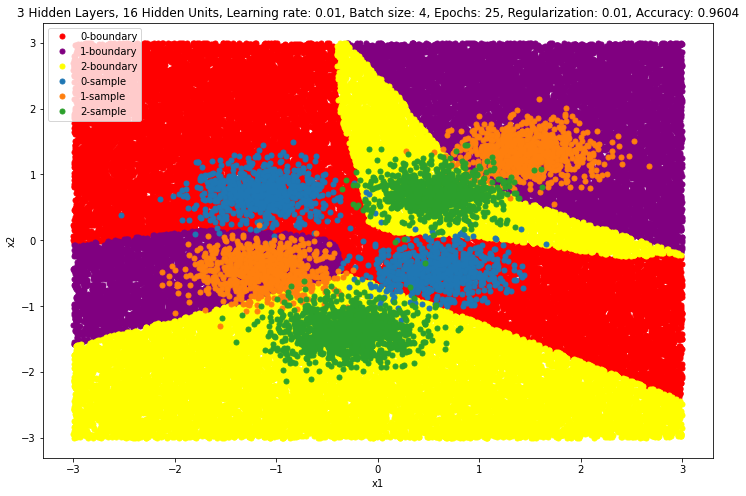

In [46]:
plot_decision_regions(NN)

d)Using the network on my Sample Data

In [47]:
data_xor3 = pd.DataFrame(np.zeros((5000, 4)), columns=['x1', 'x2', 'x3', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data_xor3.index)):
    x1 = 1.0 * random.randint(0,1)
    x2 = 1.0 * random.randint(0,1)
    x3 = 1.0 * random.randint(0,1)
    if (x1 == 1 and x2 == 0 and x3 == 0) or (x1 == 0 and x2 == 1 and x3 == 0) or (x1 == 0 and x2 == 0 and x3 == 1):
      xor_value = 1
    else:
      xor_value = 0  
    x1 = x1 + 0.15 * np.random.normal()
    x2 = x2 + 0.15 * np.random.normal()
    x3 = x3 + 0.15 * np.random.normal()
    data_xor3.iloc[i,0] = x1
    data_xor3.iloc[i,1] = x2
    data_xor3.iloc[i,2] = x3
    data_xor3.iloc[i,3] = xor_value
        
data_xor3 #60-20-20 split

,x1,x2,x3,y
0,0.008157,0.848864,0.981463,0.0
1,0.786834,0.216472,0.970612,0.0
2,-0.089167,-0.314160,0.155601,0.0
3,1.138876,1.070672,1.116368,0.0
4,0.331315,0.351498,1.035664,1.0
...,...,...,...,...
4995,0.208649,0.104566,1.247869,1.0
4996,0.236184,0.165265,0.920466,1.0
4997,0.878357,0.518809,1.071416,0.0
4998,-0.232837,0.919213,0.198539,1.0


In [48]:
train_data = data_xor3.sample(frac=0.6, random_state=seed)
train_data

,x1,x2,x3,y
4088,0.918638,0.897022,1.085266,0.0
2080,-0.161081,0.006418,1.269143,1.0
41,1.024063,0.935160,-0.061858,0.0
796,-0.081642,0.791012,-0.291320,1.0
354,0.952521,0.044212,-0.143512,1.0
...,...,...,...,...
3781,1.245889,0.038137,0.207160,1.0
4646,1.000427,-0.042997,-0.074294,1.0
3798,0.309791,1.097952,1.201286,0.0
714,1.132234,0.989084,1.132643,0.0


In [49]:
data_remaining = data_xor3.drop(train_data.index)
val_data = data_remaining.sample(frac=0.5, random_state=seed)
val_data

,x1,x2,x3,y
1098,0.974601,1.140882,-0.199698,0.0
3712,-0.012547,1.011306,-0.109978,1.0
4039,0.933901,0.315956,-0.040377,1.0
2693,0.278098,0.138601,0.854908,1.0
3244,1.093043,0.090710,-0.105697,1.0
...,...,...,...,...
4294,1.231085,0.044581,0.893384,0.0
4092,0.022316,0.737005,0.009488,1.0
111,0.767196,0.975977,1.019095,0.0
1076,0.241020,0.935641,0.830646,0.0


In [50]:
test_data = data_remaining.drop(val_data.index)
test_data

,x1,x2,x3,y
11,0.973672,-0.018719,1.191017,0.0
16,0.866766,1.128466,-0.178774,0.0
21,0.276517,0.969476,-0.044419,1.0
23,0.854647,1.218112,-0.092810,0.0
32,0.854406,-0.126989,0.998274,0.0
...,...,...,...,...
4986,-0.149636,-0.171324,0.956843,1.0
4992,0.725196,0.146380,-0.088125,1.0
4993,-0.088294,-0.077105,0.825130,1.0
4997,0.878357,0.518809,1.071416,0.0


In [51]:
cols = train_data.shape[1]
X_train_data = train_data.iloc[:,0:cols-1]
y_train_data = train_data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X_train_data = np.matrix(X_train_data.values)
y_train_data = np.matrix(y_train_data.values)

cols = val_data.shape[1]
X_val_data = val_data.iloc[:,0:cols-1]
y_val_data = val_data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X_val_data = np.matrix(X_val_data.values)
y_val_data = np.matrix(y_val_data.values)

cols = test_data.shape[1]
X_test_data = test_data.iloc[:,0:cols-1]
y_test_data = test_data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X_test_data = np.matrix(X_test_data.values)
y_test_data = np.matrix(y_test_data.values)

In [52]:
random.seed(seed)
np.random.seed(seed)

NN = MLP()
NN.add_layer("Hidden", dim_in=3, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=2)
NN.add_layer("Loss", dim_in=2, dim_out=2)

loss, val_loss, acc, val_acc = NN.train(learning_rate=0.01, batch_size=8, epochs=45, regularization=0.01, 
                          X=X_train_data, y=y_train_data, X_val=X_val_data, y_val=y_val_data)

Epoch 001 ==> Loss 0.6355, Accuracy 0.7973, Val_Loss 0.6378, Val_Accuracy 0.7710
Epoch 002 ==> Loss 0.3482, Accuracy 0.9523, Val_Loss 0.3751, Val_Accuracy 0.9360
Epoch 003 ==> Loss 0.2716, Accuracy 0.9560, Val_Loss 0.3103, Val_Accuracy 0.9390
Epoch 004 ==> Loss 0.2743, Accuracy 0.9673, Val_Loss 0.3110, Val_Accuracy 0.9550
Epoch 005 ==> Loss 0.2698, Accuracy 0.9570, Val_Loss 0.3099, Val_Accuracy 0.9460
Epoch 006 ==> Loss 0.2692, Accuracy 0.9627, Val_Loss 0.3123, Val_Accuracy 0.9460
Epoch 007 ==> Loss 0.2587, Accuracy 0.9460, Val_Loss 0.3060, Val_Accuracy 0.9340
Epoch 008 ==> Loss 0.2661, Accuracy 0.9687, Val_Loss 0.3132, Val_Accuracy 0.9530
Epoch 009 ==> Loss 0.2608, Accuracy 0.9683, Val_Loss 0.3029, Val_Accuracy 0.9540
Epoch 010 ==> Loss 0.2565, Accuracy 0.9707, Val_Loss 0.2982, Val_Accuracy 0.9560
Epoch 011 ==> Loss 0.2526, Accuracy 0.9690, Val_Loss 0.3000, Val_Accuracy 0.9580
Epoch 012 ==> Loss 0.2570, Accuracy 0.9637, Val_Loss 0.2945, Val_Accuracy 0.9510
Epoch 013 ==> Loss 0.2526, A

In [53]:
def plot_loss_and_val_loss(loss, val_loss):
  fig, ax = plt.subplots(figsize=(12,8))
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  
  ax.plot(loss, label = 'Train')
  ax.plot(val_loss, label = 'Val')
  ax.legend()
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  ax.set_title('Early Stopping')
  plt.show()

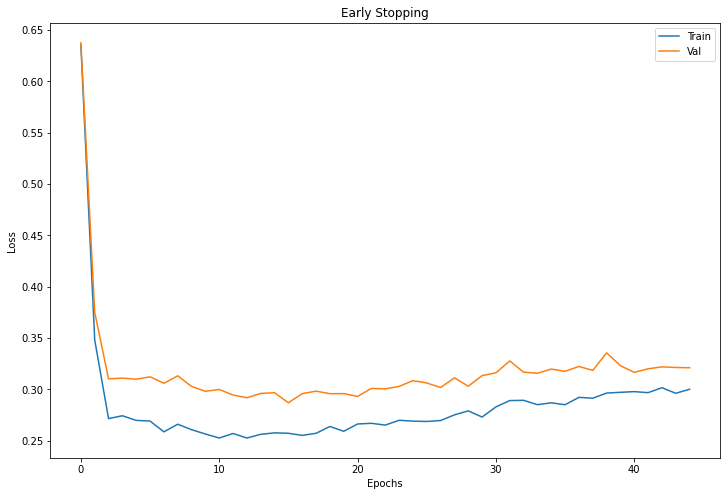

In [54]:
plot_loss_and_val_loss(loss, val_loss)

In [55]:
def plot_acc_and_val_acc(acc, val_acc):
  fig, ax = plt.subplots(figsize=(12,8))
  ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
  
  ax.plot(acc, label = 'Train')
  ax.plot(val_acc, label = 'Val')
  ax.legend()
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Accuracy')
  ax.set_title('Early Stopping')
  plt.show()

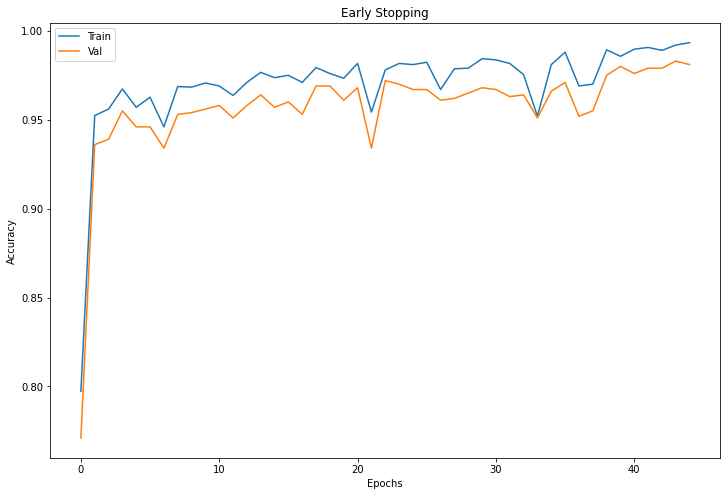

In [56]:
plot_acc_and_val_acc(acc, val_acc)

At Epoch = 22 we can see that the validation loss increases and validation accuracy decreases hence stopping the neural network model to train to prevent overfitting. Re-train the model till epoch 21 to compute accuracy on test set.

In [57]:
random.seed(seed)
np.random.seed(seed)

NN = MLP()
NN.add_layer("Hidden", dim_in=3, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Hidden", dim_in=16, dim_out=16)
NN.add_layer("Output", dim_in=16, dim_out=2)
NN.add_layer("Loss", dim_in=2, dim_out=2)

loss = NN.train(learning_rate=0.01, batch_size=8, epochs=21, regularization=0.01, 
                          X=X_train_data, y=y_train_data)

Epoch 001 ==> Loss 0.6355, Accuracy 0.7973
Epoch 002 ==> Loss 0.3482, Accuracy 0.9523
Epoch 003 ==> Loss 0.2716, Accuracy 0.9560
Epoch 004 ==> Loss 0.2743, Accuracy 0.9673
Epoch 005 ==> Loss 0.2698, Accuracy 0.9570
Epoch 006 ==> Loss 0.2692, Accuracy 0.9627
Epoch 007 ==> Loss 0.2587, Accuracy 0.9460
Epoch 008 ==> Loss 0.2661, Accuracy 0.9687
Epoch 009 ==> Loss 0.2608, Accuracy 0.9683
Epoch 010 ==> Loss 0.2565, Accuracy 0.9707
Epoch 011 ==> Loss 0.2526, Accuracy 0.9690
Epoch 012 ==> Loss 0.2570, Accuracy 0.9637
Epoch 013 ==> Loss 0.2526, Accuracy 0.9710
Epoch 014 ==> Loss 0.2562, Accuracy 0.9767
Epoch 015 ==> Loss 0.2577, Accuracy 0.9737
Epoch 016 ==> Loss 0.2573, Accuracy 0.9750
Epoch 017 ==> Loss 0.2552, Accuracy 0.9710
Epoch 018 ==> Loss 0.2572, Accuracy 0.9793
Epoch 019 ==> Loss 0.2639, Accuracy 0.9760
Epoch 020 ==> Loss 0.2592, Accuracy 0.9733
Epoch 021 ==> Loss 0.2663, Accuracy 0.9817


In [58]:
print("Accuracy of the classifier on test set : {}%".format(100*NN.get_accuracy(X_test_data, y_test_data)))

Accuracy of the classifier on test set : 98.2%
